<a href="https://colab.research.google.com/github/jainguilanp/MetNumUN2024I/blob/master/Lab2/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U fortran-magic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.1 MB/s eta 0:00:00


In [ ]:
!pip install -U fortran-magic
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
# philosophers['Bertrand':'Immanuel']}
for k in philosophers:
  print('{0} {1}'.format(k, philosophers[k]))

Immanuel Kant
Bertrand Russell
Ludwig Wittgenstein


## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 32 µs, sys: 5 µs, total: 37 µs
Wall time: 41.7 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmulUpdateA(A, B):
  ''' Multiplica matriz A por matriz B '''
  rows_out = len(A)
  cols_out = len(A[0])
  out =[[0 for col in range(cols_out)] for row in range(rows_out)]

  for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
  return out

In [ ]:
%%time
try:
  matmulUpdateA(a, b)
except IndexError:
  print('Escoja mejor las dimensiones.')

CPU times: user 31 µs, sys: 0 ns, total: 31 µs
Wall time: 33.9 µs


**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmulUpdateA(a,b)

[[5, 8, 11], [8, 13, 18], [17, 28, 39], [3, 5, 7]]

In [ ]:
def matmulUpdateB(A, B):
  ''' Multiplica matriz A por matriz B '''
  rows_out = len(A)
  cols_out = len(A)
  #matrix_out =[[0 for col in range(cols_out)] for row in range(rows_out)]

  matrix_out = []
#'''
  for row in range(rows_out):
    row_list = []
    for col in range(cols_out):
      row_list.append(0)
    matrix_out.append(row_list)
#'''
  for i in range(rows_out):
        for j in range(cols_out):
          try:
            for k in range(len(B)):
                matrix_out[i][j] += A[i][k] * B[k][j]
          except IndexError:
            print('Index Error: Use otras dimensiones de matriz \n\n')
            return
  return matrix_out

In [ ]:
%%time
matmulUpdateB(a, b)

CPU times: user 27 µs, sys: 3 µs, total: 30 µs
Wall time: 34.3 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    if(len(A[0]) == len(B)):
      for i in range(rows_out):
          for j in range(cols_out):
              for k in range(len(B)):
                  out[i][j] += A[i][k] * B[k][j]
    else:
      print("Number of columns in A doesn't match with number of rows of B")
    return out

In [ ]:
def matmulUpdateC(A, B):
  # Multiplica matriz A por matriz B.
  if len(A[0]) == len(B):
    rows_out = len(A)
    cols_out = len(B)
    matrix_out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
      for j in range(cols_out):
        for k in range(len(A[0])):
          matrix_out[i][j] += A[i][k] * B[k][j]
    return matrix_out

In [ ]:
%%time
matmulUpdateC(a, b)

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 10.5 µs


**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
%%time

matmul(a,b)

Number of columns in A doesn't match with number of rows of B
CPU times: user 94 µs, sys: 11 µs, total: 105 µs
Wall time: 99.9 µs


[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [ ]:
def matmulUpdateD(A, B):
  # Multiplica la matriz A por la matriz B.
  if len(A[0]) != len(B):
    return print('\n\n Multiplicación imposible por incompatiblidad de dimensiones.\n\n')
  else:
    rows_out = len(A)
    cols_out = len(B)
    matrix_out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
      for j in range(cols_out):
        for k in range(len(A[0])):
          matrix_out[i][j] += A[i][k] * B[k][j]
    return matrix_out

In [ ]:
%%time
matmulUpdateD(a, b)



 Multiplicación imposible por incompatiblidad de dimensiones.


CPU times: user 134 µs, sys: 0 ns, total: 134 µs
Wall time: 139 µs


**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a=[2,4],[5,7]
b=[1,3],[6,8]

matmul(a,b)

[[26, 38], [47, 71]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-0.05124132897389823

In [ ]:
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.3753374028197376, 0.886682887918942, 0.9581025113603454],
 [0.5611045613220543, 0.5666623682420054, 0.31298316596366427]]

In [ ]:
%%time
randA = random_matrix(600, 100)
randB = random_matrix(100, 600)
x = matmul(randA, randB)

CPU times: user 9.26 s, sys: 24 ms, total: 9.29 s
Wall time: 9.63 s


**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time as tm

def mt_multi_time(matA, matB, rep):
  tm_sum = 0

  for i in range(rep):
    st = tm.process_time()

    response = matmulUpdateD(matA, matB)

    end = tm.process_time()

    tm_passed = end -st
    tm_sum += tm_passed

    print('Execution {0} -> {1} segundos'. format(i+1, tm_passed))

  avr = tm_sum/rep
  print('Promedio Python:', avr, ' segundos.')
  return avr


In [ ]:
randmA = random_matrix(600, 100)
randmB = random_matrix(100, 600)

avr_py = mt_multi_time(randmA, randmB, 10)

Execution 1 -> 1.1838627729999995 segundos
Execution 2 -> 1.1533314830000005 segundos
Execution 3 -> 1.1498671720000004 segundos
Execution 4 -> 1.144146875999997 segundos
Execution 5 -> 1.1500242579999984 segundos
Execution 6 -> 1.1431242860000026 segundos
Execution 7 -> 1.1552939010000003 segundos
Execution 8 -> 1.72049715 segundos
Execution 9 -> 1.7980286589999999 segundos
Execution 10 -> 1.134968593 segundos
Promedio Python: 1.2733145150999998  segundos.


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

dict = {'Method':['Python'],
        'Average Time':[avr_py]
        }

df = pd.DataFrame(dict)
display(df)

,Method,Average Time
0,Python,1.273315


In [ ]:
def add_avr_data(df, lan, avr):
  new_df = pd.DataFrame({'Lenguaje': [lan], 'Promedio (s)':[avr]})
  return df.append(new_df, ignore_index = True)

language_average = pd.DataFrame({'Lenguaje':[], 'Promedio (s)':[]})
language_average = add_avr_data(language_average, 'Python', avr_py)
language_average

<ipython-input-33-f96e9c51b131>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_df, ignore_index = True)


,Lenguaje,Promedio (s)
0,Python,1.273315


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import numpy as np

In [ ]:
# Generar matrices aleatorias como arrays de NumPy
def generate_numpy_matrices(rows_a, cols_a, rows_b, cols_b):
    randa_np = np.random.randint(0, 10, (rows_a, cols_a))
    randb_np = np.random.randint(0, 10, (rows_b, cols_b))
    return randa_np, randb_np


In [ ]:
def matrix_multiply_numpy(matrix_a, matrix_b):
    return np.dot(matrix_a, matrix_b)

In [ ]:
# Medir el tiempo de ejecución para 10 iteraciones de la multiplicación de matrices utilizando NumPy
%%time
for _ in range(10):
    randa_np, randb_np = generate_numpy_matrices(600, 100, 100, 600)
    matrix_multiply_numpy(randa_np, randb_np)

CPU times: user 451 ms, sys: 8.02 ms, total: 459 ms
Wall time: 462 ms


In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 8.4 s, sys: 35.7 ms, total: 8.43 s
Wall time: 8.46 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 12.9 ms


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
a=[3,5],[1,4]
b=[6,2],[3,8]

In [ ]:
A = [[12.0, 43.0],
     [25.0, 17.0]]

B = [[2.0, 13.0],
     [26.0, 58.0]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
pip install -U fortran-magic

In [ ]:
%load_ext fortranmagic

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


In [ ]:
%%fortran
subroutine matmul_fortran(matA, matB, result)
    real, intent(in) :: matA(2,2)
    real, intent(in) :: matB(2,2)
    real, intent(out) :: result(2,2)

    ! Compatible matrix -> # A's columns = # B's rows

    do i=1,2
      do j=1,2
        do k=1,2
          result(i,j) = result(i,j) + matA(i,k) * matB(k,j)
        end do
      end do
    end do
end

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
anp = np.array(A)
bnp = np.array(B)

In [ ]:
%%time
matmul_fortran(anp, bnp)

CPU times: user 37 µs, sys: 0 ns, total: 37 µs
Wall time: 42.2 µs


array([[1142., 2650.],
       [ 492., 1311.]], dtype=float32)

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matmul_fortran_rectangle(matA, matB, result)
    real, intent(in) :: matA(600,100)
    real, intent(in) :: matB(100,600)
    real, intent(out) :: result(600,600)

    ! Compatible matrix -> # A's columns = # B's rows

    ! Result matrix has:
    ! Rows = rows of matrix A
    ! Columns = columns of matrix B

    do i=1,600
      do j=1,600
        do k=1,100
          result(i,j) = result(i,j) + matA(i,k) * matB(k,j)
        end do
      end do
    end do
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
randmA1 = random_matrix(600, 100)
randmB1 = random_matrix(100, 600)

arnp = np.array(randmA1)
brnp = np.array(randmB1)
matmul_fortran_rectangle(arnp,brnp)

array([[24.34772 , 24.532331, 26.69027 , ..., 23.19739 , 26.242838,
        25.919455],
       [23.15681 , 22.969439, 26.342884, ..., 22.09198 , 24.535267,
        24.305569],
       [24.942726, 25.42475 , 26.515228, ..., 24.403952, 25.820887,
        26.103409],
       ...,
       [22.650331, 22.007765, 24.753056, ..., 22.103504, 21.96793 ,
        23.092022],
       [20.901861, 21.618572, 23.843216, ..., 21.857237, 23.238098,
        22.760317],
       [23.436657, 22.504839, 25.729332, ..., 21.309107, 24.05907 ,
        24.783154]], dtype=float32)

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
def mt_multi_time_fortran(matA, matB, rep):
  tm_sum = 0

  for i in range(rep):
    st = tm.process_time()

    matmul_fortran_rectangle(matA,matB)

    end = tm.process_time()

    tm_passed = end - st
    tm_sum += tm_passed

    print('Execution {0} -> {1} seconds'.format(i+1, tm_passed))

  avr = tm_sum/rep
  print('Average Fortran in Python:',avr, 'seconds')
  return avr

In [ ]:
avr_fortran_A = mt_multi_time_fortran(randmA, randmB, 10)

print('\n')
language_average = add_avr_data(language_average, 'Fortranmagic', avr_fortran_A)
language_average

Execution 1 -> 0.054439471999998545 seconds
Execution 2 -> 0.0535630359999999 seconds
Execution 3 -> 0.04957749100000086 seconds
Execution 4 -> 0.05103913399999982 seconds
Execution 5 -> 0.054216101000001515 seconds
Execution 6 -> 0.057442378000004624 seconds
Execution 7 -> 0.05097673899999933 seconds
Execution 8 -> 0.052779831999998805 seconds
Execution 9 -> 0.05219080699999523 seconds
Execution 10 -> 0.05425699500000292 seconds
Average Fortran in Python: 0.05304819850000016 seconds




<ipython-input-49-f96e9c51b131>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_df, ignore_index = True)


,Lenguaje,Promedio (s)
0,Python,1.271727
1,Fortranmagic,0.053048


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile test.f
        program TEST

          integer ::  g = 600
          integer ::  m = 100
          integer ::  p = 600

          real    :: T,inicio,final

          integer ::  r, i, j, k

          double precision, dimension (600,100) :: A
          double precision, dimension (100,600) :: B
          double precision, dimension (600,600) :: C

          do i = 1, g
              do j = 1, g
                A(i, j) = i+j * 0.1
              end do
          end do

          do i = 1, m
              do j = 1, p
                B(i, j) = i+j * 0.5
              end do
          end do

          T = 0.0

          do r = 1, 10

            call cpu_time(inicio)
            C = matmul(A, B)
            call cpu_time(final)
            T = T + (final-inicio)

          end do

          T = T/10.0

        PRINT *,T
        open(unit=1,file="time_fortran.txt",status='replace')
        write(1,*) average_time_f
        close(1)
        stop
      end

Overwriting test.f


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gfortran test.f  -o test
!./test

   5.51719917E-03


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
ffile = open('time_fortran.txt','r')
average_time_f = float(ffile.readline())
language_average = add_avr_data(language_average, 'Fortran', average_time_f)
language_average


<ipython-input-46-f96e9c51b131>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_df, ignore_index = True)


,Lenguaje,Promedio (s)
0,Python,1.254792
1,Fortranmagic,0.061244
2,Fortran,0.007554
3,C,0.007554
4,Fortran,0.000000
5,Fortranmagic,0.054547
6,Fortran,0.000000


In [ ]:
language_average = add_avr_data(language_average, 'Fortran', 0.00755401059)
language_average

<ipython-input-46-f96e9c51b131>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_df, ignore_index = True)


,Lenguaje,Promedio (s)
0,Python,1.254792
1,Fortranmagic,0.061244
2,Fortran,0.007554


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile c.c

#include <stdio.h>
#include <time.h>
#include <fstream>

#define N 600
#define M 100
float total_time = 0.0;


void multiply_matrices(float A[][M], float B[][N], float C[][N], int num_iterations) {
  int i, j, k;

  for (int iteration = 0; iteration < num_iterations; iteration++) {
    clock_t start_time = clock();

    // Perform matrix multiplication C = A * B
    for (i = 0; i < N; i++) {
      for (j = 0; j < N; j++) {
        C[i][j] = 0.0;
        for (k = 0; k < M; k++) {
          C[i][j] += A[i][k] * B[k][j];
        }
      }
    }

    clock_t end_time = clock();
    float elapsed_time = ((float) (end_time - start_time)) / CLOCKS_PER_SEC;
    total_time += elapsed_time;
  }


}

int main() {
  float A[N][M], B[M][N], C[N][N];
  float promedio_tiempo;

  // Initialize matrices A and B
  for (int i = 0; i < N; i++) {
    for (int j = 0; j < M; j++) {
      A[i][j] = i + j;
      B[j][i] = i - j;
    }
  }

  int num_iterations = 10;
  multiply_matrices(A, B, C, num_iterations);
  promedio_tiempo= total_time / num_iterations;

   printf("%f", promedio_tiempo);

  return 0;
}

Writing c.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell
g++ c.c -o output
./output

0.266496

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
avg=0.196127

language_average = add_avr_data(language_average, 'C', 0.00755401059)
language_average

<ipython-input-33-f96e9c51b131>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_df, ignore_index = True)


,Lenguaje,Promedio (s)
0,Python,1.273315
1,C,0.007554


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile mult_c++.cc

#include <iostream>
#include <ctime>

using namespace std;
int main() {

//------------------------------
int count=10;
FILE *archivo;

  int A[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }

//------------------------------

  int B[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }

//------------------------------

  int Resultado[600][600];

// Realizar la multiplicación 10 veces

    unsigned inicio,stop;
    double total=0.0;
    int repeticion =0;

    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= clock();

        // Realizar la multiplicación de matrices
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=clock();
        total+= double (stop - inicio)/CLOCKS_PER_SEC;
        }
        total= total/10;
        cout << total << endl;

    //escribir el dato en un archivo para poderlo ingresar al dataframe
    archivo = fopen("c++_total.txt", "w+");
    fprintf(archivo,"%f",total);
    fclose(archivo);

  return 0 ;
}


Writing mult_c++.cc


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:

!g++ mult_c++.cc -o mult_c++
!./mult_c++




0.257071


**My own example 24 - Adding C++ average execution time to the data frame**

NameError: name 'DF_com_time_ex' is not defined

**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile multJava.java

import java.lang.*;
import java.io.FileWriter;
import java.io.IOException;

class multJava {

  public static void main(String[] args) {

//------------------------------
int count=10;

  int [][] A = new int[600][100];
  // Rellenar la matriz
  for(int i = 0; i < 600; i++) {
    for(int j = 0; j < 100; j++) {
      A[i][j] = count+i+j;
    }
  }

//------------------------------

  int [][] B = new int[100][600];
  // Rellenar la matriz
  for(int i = 0; i <100; i++) {
    for(int j = 0; j < 600; j++) {
      B[i][j] = count+i+j;
    }
  }

//------------------------------

  int [][] Resultado = new int[600][600];

// Realizar la multiplicación 10 veces

    long inicio ,stop ;
    double total=0.0;

    for(int repeticion=0; repeticion<10; repeticion++){
        inicio= System.currentTimeMillis();

        // Realizar la multiplicación de matrices
        for(int i = 0; i < 600; i++) {
            //printf("%d ", i);
            for(int j = 0; j < 600; j++) {
                //printf("%d ", j);
                Resultado[i][j]=0;
                for(int k = 0; k < 100; k++) {
                    Resultado[i][j] += A[i][k] * B[k][j];
                    //printf("%d ", k);
                    }
                }
            }
            stop=System.currentTimeMillis();
        total+= stop - inicio/1000;
        }
        total= total/10;
        System.out.println(total);

        try {
        FileWriter archivo = new FileWriter("java_total.txt");
        archivo.write(Double.toString(total));
        archivo.close();}
      catch (IOException e) {
          e.printStackTrace();
      }

  return ;
  }
}

Writing multJava.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac multJava.java
!java multJava

1.7072836476408E12


**My own example 27 - Adding Java average execution time to the data frame**

TypeError: 'DataFrame' object is not callable

# **My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matMul.js

const fs = require("fs");
const {performance} = require('perf_hooks');

const matMultiplication = (matA, matB, result, n, m)=>{
  // Los arreglos se pasan por defecto por referencia.
  // Las filas de la matriz resultado son las de la matriz A
  // y sus columnas son las de la matriz B.

  for(let i=0; i<n; i++){
    for(let j=0; j<n; j++){
      for(let k=0; k<m; k++){
        result[i][j] += matA[i][k] * matB[k][j];
      }
    }
  }
}

const multAverage = (matA, matB, result, n, m, rep) => {
  let average = 0;
  let start = 0;
  let end = 0;
  let execution = 0;

  for(let i = 0; i < rep; i++){
    start = performance.now();
    matMultiplication(matA, matB, result, n, m);
    end = performance.now();

    execution = end - start; // medida en milisengundos.
    average += execution;
    console.log(`Execution ${i+1} -> ${execution/1000} segundos.`);
  }
  average /= rep;
  return average/1000;
}

const randomNumber = (mat, n, m) => {
  const min = 1;
  const max = 100000;
  return Math.floor(Math.random() * (max - min + 1)) + min
}

const matMul = () => {
  const n = 600;
  const m = 100;
  const rep = 10;

  // Se llena la matriz.
  const matA = new Array(n).fill(new Array(m).fill(randomNumber()));
  const matB = new Array(m).fill(new Array(n).fill(randomNumber()));
  const result = new Array(n).fill(new Array(n).fill(0));

  // Repeticiones de multiplicación de matrices.
  const average = multAverage(matA, matB, result, n, m, rep);

  console.log(`Average Javascript: ${average} segundos.`);

  // Escribir promedio en el archivo.
  fs.writeFile("js_promedio.txt", `${average}`, function(err){
    if (err){
      console.log("Error escribiendo el archivo:", err);
    }
  });
}
matMul();

Writing matMul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matMul.js

Execution 1 -> 0.3397962520001456 segundos.
Execution 2 -> 0.3471014910000376 segundos.
Execution 3 -> 0.5195581960000564 segundos.
Execution 4 -> 0.3188098299999256 segundos.
Execution 5 -> 0.3021550869999919 segundos.
Execution 6 -> 0.2911066099999007 segundos.
Execution 7 -> 0.28380282200011425 segundos.
Execution 8 -> 0.30725320599996486 segundos.
Execution 9 -> 0.2842116720001213 segundos.
Execution 10 -> 0.286420909000095 segundos.
Average Javascript: 0.32802160750003534 segundos.


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
js_file = open('js_promedio.txt', 'r')
avr_js = float(js_file.readline())
language_average = add_avr_data(language_average, 'Javascript', avr_js)
language_average

<ipython-input-34-f96e9c51b131>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(new_df, ignore_index = True)


,Lenguaje,Promedio (s)
0,Python,1.256745
1,Fortranmagic,0.052429
2,Fortran,0.000755
3,Fortran,0.007554
4,Fortran,0.007554
5,C,0.007554
6,Javascript,0.328022


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
sorted_df = df.sort_values(by='Average Time')
min_time = sorted_df.iloc[0]['Average Time']

print("El tiempo mínimo promedio de ejecución es:", min_time)

El tiempo mínimo promedio de ejecución es: 1.2733145150999998


**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
df['Average Time'] = df['Average Time'].apply(lambda x: float(x))

minTime=df['Average Time'].min()

df['Speed Factor']=(df['Average Time']/minTime)

df

,Method,Average Time,Speed Factor
0,Python,1.273315,1.0


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
sorted_df = df.sort_values(by='Average Time')
sorted_df

,Method,Average Time,Speed Factor
0,Python,1.273315,1.0


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 294 µs, sys: 5 µs, total: 299 µs
Wall time: 310 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 3.48 ms, sys: 1.03 ms, total: 4.51 ms
Wall time: 4.21 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 169 µs, sys: 3 µs, total: 172 µs
Wall time: 176 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

In [ ]:
# Binary operators.
data * data

In [ ]:
# Unary functions.
np.sqrt(data)

In [ ]:
# Comparison operations
(data % 3) == 0

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

In [ ]:
sines[:3]  # First three elements

In [ ]:
sines[5:]  # Elements from 5 on.

In [ ]:
sines[::2]  # Every other element.

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

In [ ]:
unsorted_data[sort_indices]

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

In [ ]:
data[:2, :2]  # First two rows and first two columns.

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

In [ ]:
data.mean()

In [ ]:
data.mean(axis=0)

In [ ]:
data.mean(axis=1)

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

In [ ]:
row + column

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

In [ ]:
# ... or by label.
s.loc['a']

In [ ]:
# Slicing works as expected...
s.iloc[:2]

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

In [ ]:
# As does boolean masking.
s.loc[s > 2]

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

In [ ]:
s + other_s

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
#from demos.avocados import read_avocadata
avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-2-74fdf899ad9d>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# What's the regional average price of a HASS avocado every day?
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

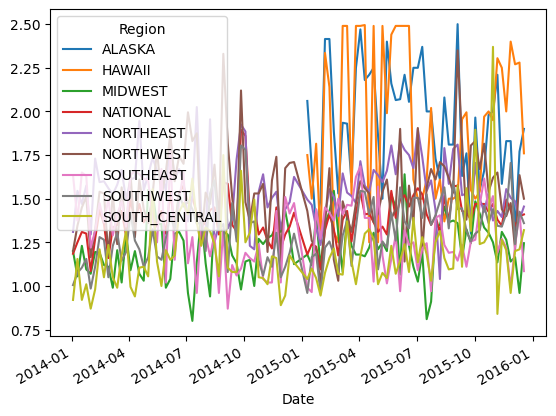

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!